# Data

## Data analysis

In [1]:
# data load

import pandas as pd

titanic_train = pd.read_csv("/content/drive/MyDrive/삼육대 실습/Titanic/train.csv")
titanic_test = pd.read_csv("/content/drive/MyDrive/삼육대 실습/Titanic/test.csv")

In [2]:
titanic_train.shape

(891, 12)

In [3]:
titanic_test.shape

(418, 11)

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
'''
데이터 딕셔너리
survived : 생존=1, 죽음=0
pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
sibsp : 함께 탑승한 형제 또는 배우자 수
parch : 함께 탑승한 부모 또는 자녀 수
ticket : 티켓 번호
cabin : 선실 번호
embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
'''

'\n데이터 딕셔너리\nsurvived : 생존=1, 죽음=0\npclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3\nsibsp : 함께 탑승한 형제 또는 배우자 수\nparch : 함께 탑승한 부모 또는 자녀 수\nticket : 티켓 번호\ncabin : 선실 번호\nembarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown\n'

In [7]:
# null check
# null 값이 많은순: Cabin - Age - Embarked - Fare

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 계층적 샘플링

Age_labels = [0,10,20,30,40,50,60,70,80,90]

titanic_train["Age_cat"] = pd.cut(titanic_train["Age"],bins=10,labels=Age_labels)

labels = [0,50,100,150,200,250,300,350,400,450,500,550]

titanic_train["Fare_cat"] = pd.cut(titanic_train["Fare"],bins=12,labels=labels)

In [11]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40,50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40,50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,30,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,20,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30,0


## Data correlation

In [12]:
titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
import matplotlib.pyplot as plt

def bar_chart(feature):
    survived = titanic_train[titanic_train['Survived']==1][feature].value_counts()
    dead = titanic_train[titanic_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

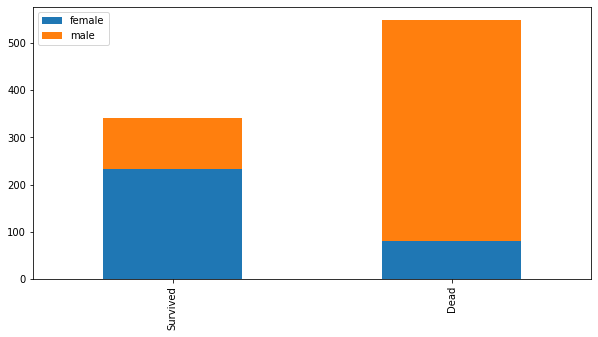

In [14]:
bar_chart('Sex')

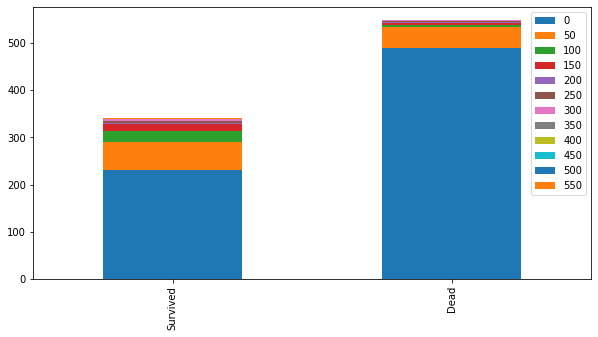

In [15]:
bar_chart('Fare_cat')

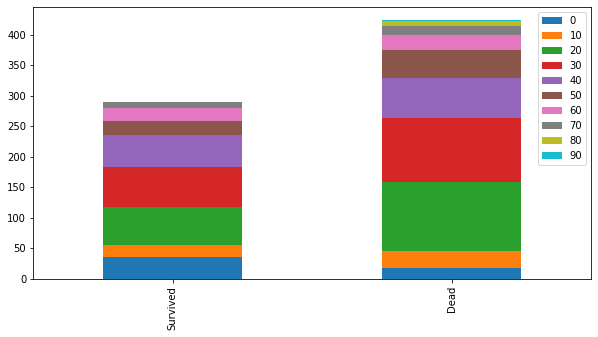

In [16]:
bar_chart('Age_cat')

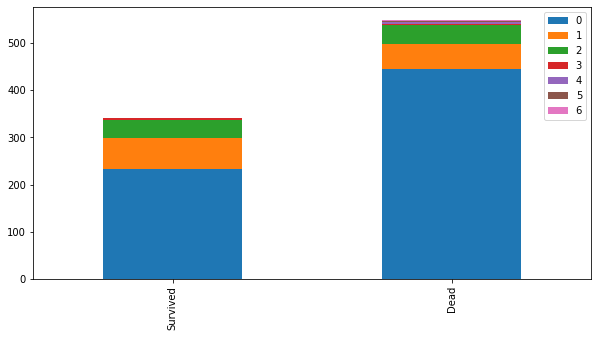

In [17]:
bar_chart('Parch')

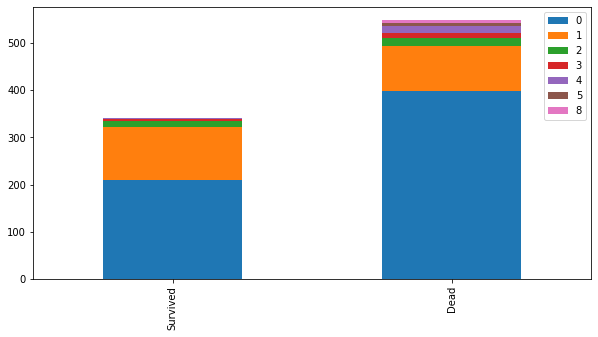

In [18]:
bar_chart('SibSp')

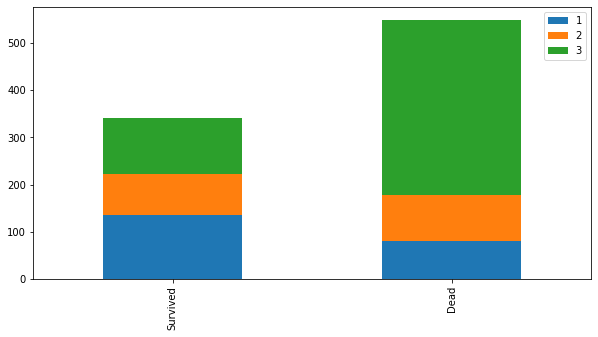

In [19]:
bar_chart('Pclass')

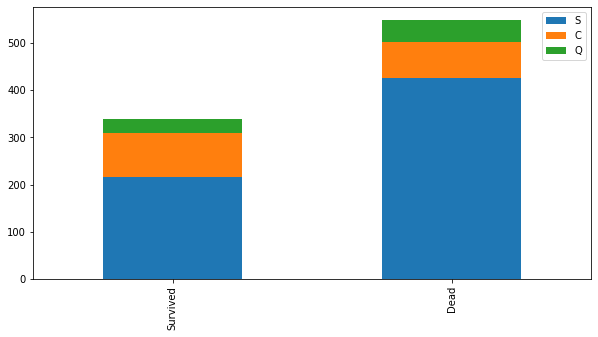

In [20]:
bar_chart('Embarked')

## Data Processing

In [21]:
del titanic_train['Cabin']
del titanic_train['Ticket']
del titanic_train['Name']
del titanic_train['PassengerId']
del titanic_train['Age_cat']
del titanic_train['Fare_cat']
del titanic_test['Cabin']
del titanic_test['Ticket']
del titanic_test['Name']
del titanic_test['PassengerId']

In [22]:
train_fill = titanic_train.copy()
train_fill['Age'].fillna(train_fill['Age'].mean(), inplace = True)  # Empty Age add
train_fill['Embarked'] = train_fill['Embarked'].fillna('S')    # Empty Embarked add

test_fill = titanic_test.copy()
test_fill['Age'].fillna(test_fill['Age'].mean(), inplace = True)    # Empty Age add
test_fill['Fare'].fillna(test_fill['Fare'].mean(), inplace = True)   # Empty Fare add

train_del = titanic_train.copy()
test_del = titanic_test.copy()
train_del.dropna(how='any', inplace=True)   # Empty data delete
test_del.dropna(how='any', inplace=True)    # Empty data delete

In [23]:
train_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [24]:
test_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [25]:
train_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [26]:
test_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    object 
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.7+ KB


In [27]:
# One-hot-encoding for categorical variables
train_fill = pd.get_dummies(train_fill)
test_fill = pd.get_dummies(test_fill)

train_del = pd.get_dummies(train_del)
test_del = pd.get_dummies(test_del)

train_fill_label = train_fill['Survived']
train_fill_data = train_fill.drop('Survived', axis=1)

train_del_label = train_del['Survived']
train_del_data = train_del.drop('Survived', axis=1)

# Scikit-Learn

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
from sklearn.utils import shuffle

train_fill_data, train_fill_label = shuffle(train_fill_data, train_fill_label, random_state = 42)
train_del_data, train_del_label = shuffle(train_del_data, train_del_label, random_state = 42)

## Model generation

In [30]:
def fill_train_and_test(model):
    model.fit(train_fill_data, train_fill_label)
    prediction = model.predict(test_fill)
    accuracy = round(model.score(train_fill_data, train_fill_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [31]:
def del_train_and_test(model):
    model.fit(train_del_data, train_del_label)
    prediction = model.predict(test_del)
    accuracy = round(model.score(train_del_data, train_del_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

## Model prediction

In [32]:
# Logistic Regression
log_pred = fill_train_and_test(LogisticRegression())
# SVM
svm_pred = fill_train_and_test(SVC())
#kNN
knn_pred_4 = fill_train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = fill_train_and_test(RandomForestClassifier(n_estimators=500))
# Navie Bayes
nb_pred = fill_train_and_test(GaussianNB())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy :  80.13 %
Accuracy :  68.69 %
Accuracy :  80.7 %
Accuracy :  98.2 %
Accuracy :  79.12 %


In [33]:
# Logistic Regression
log_pred = del_train_and_test(LogisticRegression())
# SVM
svm_pred = del_train_and_test(SVC())
#kNN
knn_pred_4 = del_train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = del_train_and_test(RandomForestClassifier(n_estimators=500))
# Navie Bayes
nb_pred = del_train_and_test(GaussianNB())

Accuracy :  80.2 %
Accuracy :  67.84 %
Accuracy :  79.63 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy :  98.6 %
Accuracy :  77.95 %


# CSV For Kaggle

In [34]:
# X_train = train_fill.drop("Survived",axis=1)
# Y_train = train_fill["Survived"]
# X_test  = test_fill

In [35]:
# Random Forests
# from sklearn.ensemble import RandomForestClassifier

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)

# submission = pd.DataFrame({
#         "PassengerId": test_fill["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('titanic.csv', index=False)